In [7]:
!pip show numpy

Name: numpy
Version: 1.26.0
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [1]:
!pip uninstall -y numpy
!pip install numpy==1.24.3
!pip uninstall -y scikit-surprise
!pip install scikit-surprise

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompati

  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl


In [3]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505198 sha256=8d92d732e8f9bdb3a2b80a2aab150ea4ff48c1f997f0b31f6e6c62c75bbc53e0
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [5]:
!pip install numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2



===== OPTIMIZED RECOMMENDATION ENGINE DEMO =====
This version is optimized for large datasets with:
- Chunked loading of data
- Caching of models and computed data
- Parallel processing for intensive operations
- Lazy loading of ratings data
- Memory usage optimization

Run in sample mode for testing? (y/n): y

Initializing recommendation engine...

Enable collaborative filtering? (y/n): y

Initializing collaborative filtering...

Run evaluation (may take time)? (y/n): y

Evaluating recommendation systems...

Content-based evaluation results:
  Precision@10: 0.3741
  Category match rate: 0.4400

Collaborative filtering evaluation results:
  RMSE: 1.3124 ± 0.0002
  MAE: 1.0554 ± 0.0034


Enter a product name (or 'quit' to exit): IPhone
Enter user ID for hybrid recommendations (or press Enter for content-based only): 

Content-based Recommendations for 'IPhone':
1. AW High Power Usb for Iphone 4 Lightning Cable (Category: ["Mobiles & Accessories >> Mobile Accessories >> Cables >> AW Cab

KeyboardInterrupt: Interrupted by user

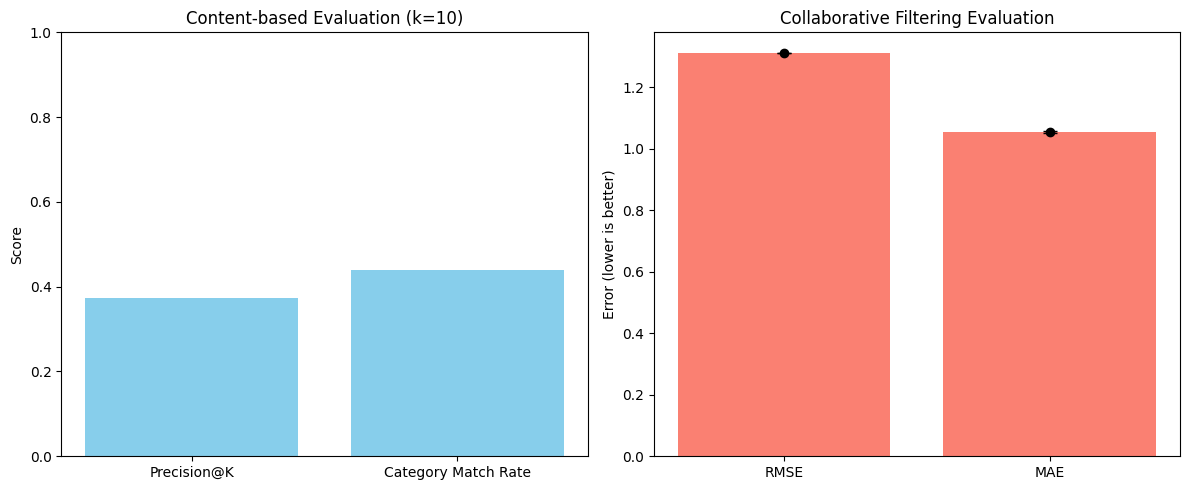

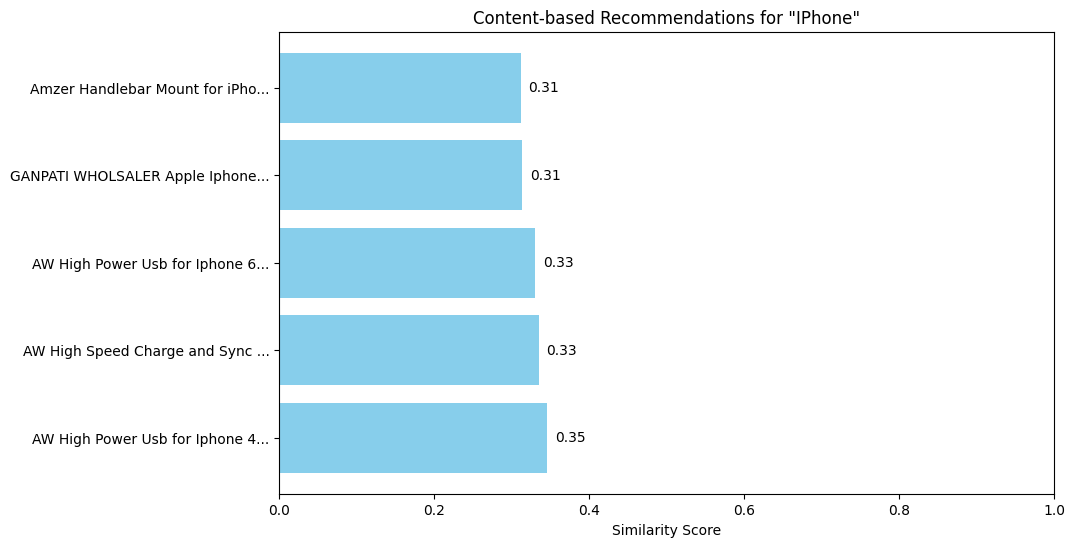

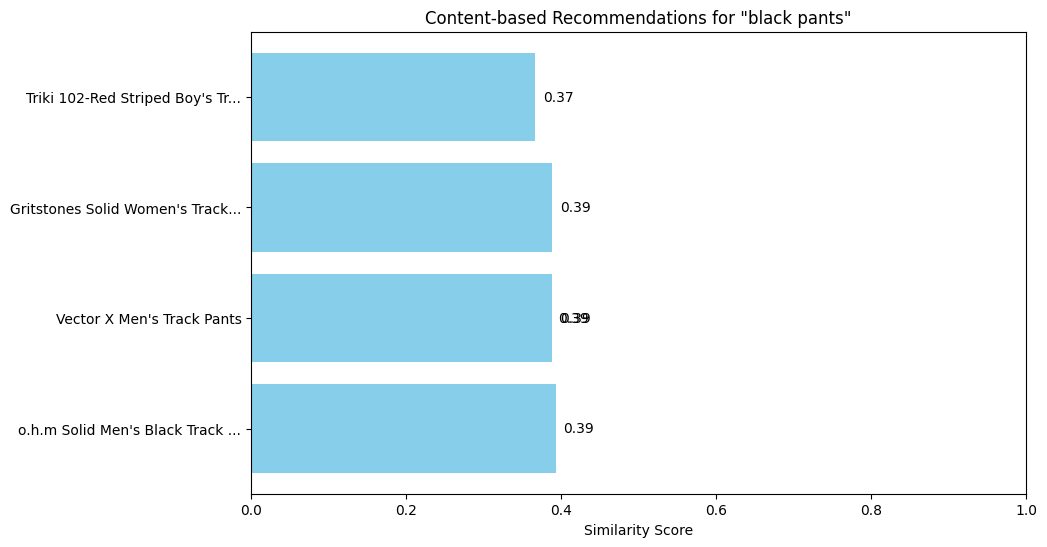

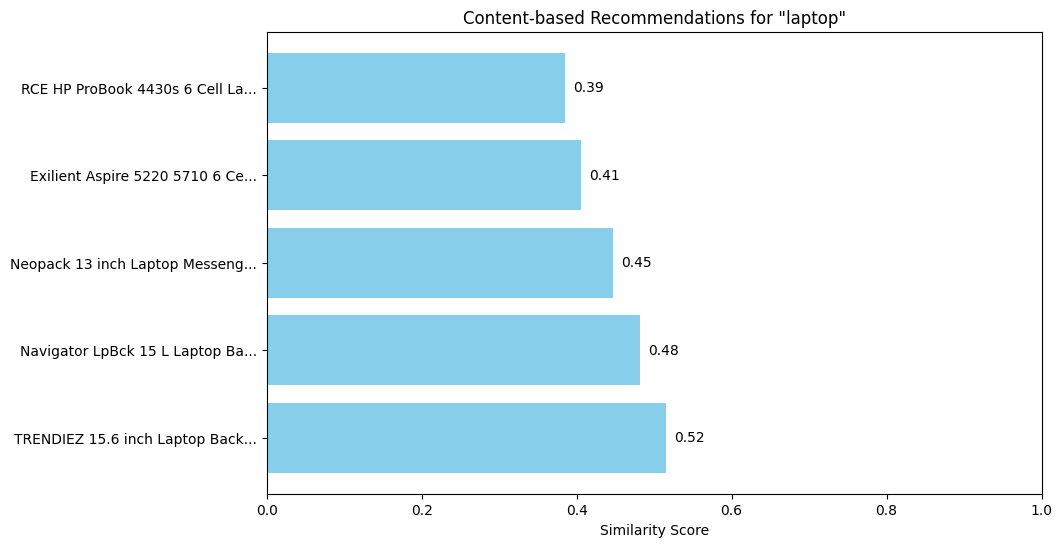

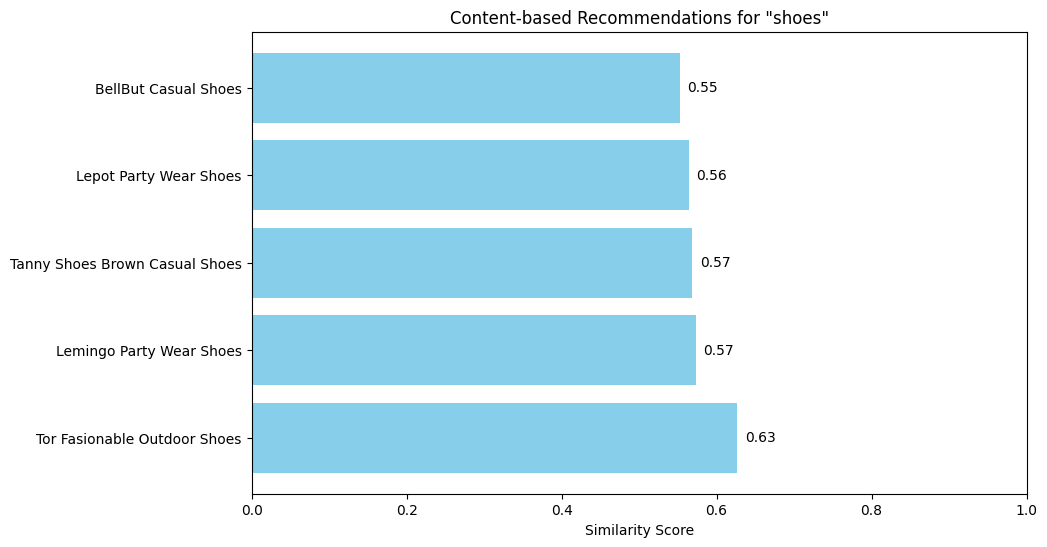

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate
import logging
import gc
from joblib import Parallel, delayed, dump, load
import os
from tqdm import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class OptimizedRecommendationEngine:
    def __init__(self, products_file, ratings_file, sample_size=None, cache_dir='./cache'):
        """
        Initialize the recommendation engine with product and rating data.

        Args:
            products_file (str): Path to the products CSV file
            ratings_file (str): Path to the ratings CSV file
            sample_size (int, optional): Number of products to sample (for testing)
            cache_dir (str): Directory to store cached data
        """
        self.products_file = products_file
        self.ratings_file = ratings_file
        self.sample_size = sample_size
        self.cache_dir = cache_dir

        # Create cache directory if it doesn't exist
        if not os.path.exists(cache_dir):
            os.makedirs(cache_dir)

        # Flag for collaborative filtering
        self.collab_initialized = False

        # Load data using optimized approach
        self._load_data()

        # Initialize content-based recommendation system
        self._init_content_based()

    def _load_data(self):
        """
        Load data efficiently with chunking and sampling.
        """
        # Define usecols to only load necessary columns
        product_cols = ['uniq_id', 'product_name', 'product_category_tree', 'description']

        # Load products with chunking
        logger.info("Loading product data...")
        if self.sample_size:
            # Sample for testing
            self.products_df = pd.read_csv(
                self.products_file,
                usecols=product_cols
            ).sample(self.sample_size, random_state=42)
        else:
            # Use chunking for full dataset
            chunks = []
            for chunk in tqdm(pd.read_csv(self.products_file, usecols=product_cols, chunksize=100000)):
                chunks.append(chunk)
            self.products_df = pd.concat(chunks)

        # Clean product data
        self.products_df = self.products_df.dropna(subset=['product_name'])

        # Add a product ID column if not exists
        if 'pid' not in self.products_df.columns:
            self.products_df['pid'] = self.products_df['uniq_id']

        # Create simple text features for content-based filtering
        logger.info("Creating text features...")
        self.products_df['text_features'] = (
            self.products_df['product_name'] + ' ' +
            self.products_df['product_category_tree'].fillna('') + ' ' +
            self.products_df['description'].fillna('')
        ).str.lower()

        # Free up memory
        self.products_df = self.products_df[['pid', 'product_name', 'product_category_tree', 'text_features']]
        gc.collect()

        # Only load ratings if needed (lazy loading)
        self.ratings_df = None

        logger.info(f"Loaded {len(self.products_df)} products")

    def _load_ratings(self):
        """
        Lazy loading of ratings data when needed.
        """
        if self.ratings_df is None:
            logger.info("Loading ratings data...")

            # Define columns to load
            rating_cols = ['UserId', 'ProductId', 'Rating']

            if self.sample_size:
                # Sample for testing
                self.ratings_df = pd.read_csv(
                    self.ratings_file,
                    usecols=rating_cols
                ).sample(min(self.sample_size * 5, 100000), random_state=42)
            else:
                # Use chunking for full dataset
                chunks = []
                for chunk in tqdm(pd.read_csv(self.ratings_file, usecols=rating_cols, chunksize=100000)):
                    chunks.append(chunk)
                self.ratings_df = pd.concat(chunks)

            logger.info(f"Loaded {len(self.ratings_df)} ratings")

    def _init_content_based(self):
        """
        Initialize the content-based recommendation system using cached TF-IDF.
        """
        tfidf_cache = os.path.join(self.cache_dir, 'tfidf_vectorizer.joblib')
        tfidf_matrix_cache = os.path.join(self.cache_dir, 'tfidf_matrix.npz')

        if os.path.exists(tfidf_cache) and os.path.exists(tfidf_matrix_cache):
            # Load from cache
            logger.info("Loading TF-IDF from cache...")
            self.tfidf = load(tfidf_cache)
            self.tfidf_matrix = load(tfidf_matrix_cache)
        else:
            # Create and cache TF-IDF vectorizer
            logger.info("Creating TF-IDF vectors...")
            self.tfidf = TfidfVectorizer(
                stop_words='english',
                max_features=10000,  # Limit features to improve performance
                ngram_range=(1, 2)   # Include bigrams
            )

            # Create document vectors
            self.tfidf_matrix = self.tfidf.fit_transform(self.products_df['text_features'])

            # Cache for future use
            logger.info("Caching TF-IDF data...")
            dump(self.tfidf, tfidf_cache)
            dump(self.tfidf_matrix, tfidf_matrix_cache)

        logger.info(f"TF-IDF matrix shape: {self.tfidf_matrix.shape}")

    def add_collaborative_filtering(self):
        """
        Implement collaborative filtering using SVD for matrix factorization.
        """
        # Lazy load ratings data
        self._load_ratings()

        svd_cache = os.path.join(self.cache_dir, 'svd_model.joblib')

        if os.path.exists(svd_cache):
            # Load from cache
            logger.info("Loading SVD model from cache...")
            self.svd_model = load(svd_cache)
            self.collab_initialized = True
        else:
            # Prepare the data for Surprise library
            logger.info("Preparing data for collaborative filtering...")
            reader = Reader(rating_scale=(1, 5))
            data = Dataset.load_from_df(
                self.ratings_df[['UserId', 'ProductId', 'Rating']],
                reader
            )

            # Build and train the SVD model
            logger.info("Training SVD model...")
            self.svd_model = SVD(n_factors=50, n_epochs=10)  # Reduced factors and epochs
            self.svd_model.fit(data.build_full_trainset())

            # Cache for future use
            logger.info("Caching SVD model...")
            dump(self.svd_model, svd_cache)

            self.collab_initialized = True

        logger.info("Collaborative filtering initialized")

    def recommend_by_name(self, product_name, top_n=10):
        """
        Recommend products similar to the given product name.

        Args:
            product_name (str): Name of the product to find recommendations for
            top_n (int): Number of recommendations

        Returns:
            list: Recommended products with metadata
        """
        # Convert the product name to document vector
        query_vec = self.tfidf.transform([product_name.lower()])

        # Calculate similarity efficiently with sparse matrices
        similarities = cosine_similarity(query_vec, self.tfidf_matrix).flatten()

        # Get top indices directly
        top_indices = similarities.argsort()[-top_n*2:][::-1]

        # Create recommendations
        recommendations = []
        seen_pids = set()

        for idx in top_indices:
            product = self.products_df.iloc[idx]
            pid = product['pid']

            if (pid not in seen_pids and
                product['product_name'].lower() != product_name.lower()):

                recommendations.append({
                    'pid': pid,
                    'name': product['product_name'],
                    'similarity_score': similarities[idx],
                    'category': product.get('product_category_tree', 'N/A')
                })

                seen_pids.add(pid)

                if len(recommendations) >= top_n:
                    break

        return recommendations

    def recommend_by_user(self, user_id, top_n=10):
        """
        Generate recommendations for a user based on collaborative filtering.

        Args:
            user_id (int): User ID to recommend for
            top_n (int): Number of recommendations

        Returns:
            list: Recommended products with predicted ratings
        """
        if not self.collab_initialized:
            logger.info("Collaborative filtering not initialized. Initializing now...")
            self.add_collaborative_filtering()

        # Get products the user has already rated
        user_rated = set(self.ratings_df[self.ratings_df['UserId'] == user_id]['ProductId'])

        # Get a sample of products for prediction (improve performance)
        if len(self.products_df) > 1000:
            candidate_products = self.products_df.sample(n=1000, random_state=42)
        else:
            candidate_products = self.products_df

        # Generate predictions for unrated products in parallel
        predictions = Parallel(n_jobs=-1)(
            delayed(self._predict_rating)(user_id, product['pid'])
            for _, product in candidate_products.iterrows()
            if product['pid'] not in user_rated
        )

        # Sort predictions and get top N
        predictions.sort(key=lambda x: x[1], reverse=True)
        top_predictions = predictions[:top_n]

        # Format recommendations
        recommendations = []
        for product_id, predicted_rating in top_predictions:
            # Find product info
            product_info = self.products_df[self.products_df['pid'] == product_id]
            if len(product_info) > 0:
                product = product_info.iloc[0]
                recommendations.append({
                    'pid': product_id,
                    'name': product['product_name'],
                    'predicted_rating': predicted_rating,
                    'category': product.get('product_category_tree', 'N/A')
                })

        return recommendations

    def _predict_rating(self, user_id, product_id):
        """Helper function for parallel prediction"""
        predicted_rating = self.svd_model.predict(user_id, product_id).est
        return (product_id, predicted_rating)

    def hybrid_recommendations(self, user_id, product_name, top_n=10, weight_content=0.5):
        """
        Generate hybrid recommendations using both content-based and collaborative filtering.

        Args:
            user_id (int): User ID for collaborative recommendations
            product_name (str): Product name for content-based recommendations
            top_n (int): Number of recommendations
            weight_content (float): Weight for content-based recommendations (0-1)

        Returns:
            list: Hybrid recommended products
        """
        # Get content-based recommendations - don't get too many to improve performance
        content_recs = self.recommend_by_name(product_name, top_n=top_n)

        # Try to get collaborative filtering recommendations
        try:
            collab_recs = self.recommend_by_user(user_id, top_n=top_n)
        except Exception as e:
            logger.warning(f"Error getting collaborative recommendations: {e}")
            return content_recs

        # Create dictionaries for easy lookup
        content_scores = {rec['pid']: rec['similarity_score'] for rec in content_recs}
        collab_scores = {rec['pid']: rec['predicted_rating'] for rec in collab_recs}

        # Get all unique products
        all_pids = set(content_scores.keys()) | set(collab_scores.keys())

        # Simple min-max scaling for normalization
        min_content = min(content_scores.values()) if content_scores else 0
        max_content = max(content_scores.values()) if content_scores else 1
        min_collab = min(collab_scores.values()) if collab_scores else 0
        max_collab = max(collab_scores.values()) if collab_scores else 5

        # Calculate hybrid scores
        hybrid_scores = {}
        for pid in all_pids:
            # Normalize content score if available
            if pid in content_scores:
                norm_content = (content_scores[pid] - min_content) / (max_content - min_content) if max_content > min_content else 0.5
            else:
                norm_content = 0

            # Normalize collaborative score if available
            if pid in collab_scores:
                norm_collab = (collab_scores[pid] - min_collab) / (max_collab - min_collab) if max_collab > min_collab else 0.5
            else:
                norm_collab = 0

            # Calculate weighted hybrid score
            hybrid_scores[pid] = (weight_content * norm_content) + ((1 - weight_content) * norm_collab)

        # Sort by hybrid score and get top recommendations
        sorted_pids = sorted(hybrid_scores.keys(), key=lambda pid: hybrid_scores[pid], reverse=True)
        top_pids = sorted_pids[:top_n]

        # Generate final recommendations
        recommendations = []
        for pid in top_pids:
            # Find product in dataframe
            product_info = self.products_df[self.products_df['pid'] == pid]
            if len(product_info) > 0:
                product = product_info.iloc[0]

                # Get individual scores (original values)
                content_score = content_scores.get(pid, 0)
                collab_score = collab_scores.get(pid, 0)

                recommendations.append({
                    'pid': pid,
                    'name': product['product_name'],
                    'hybrid_score': hybrid_scores[pid],
                    'content_score': content_score,
                    'collab_score': collab_score,
                    'category': product.get('product_category_tree', 'N/A')
                })

        return recommendations

    def evaluate_content_recommendations(self, test_size=0.1, k=10):
        """
        Evaluate content-based recommendations using a hold-out test set.

        Args:
            test_size (float): Proportion of data to use for testing
            k (int): Number of recommendations to consider

        Returns:
            dict: Evaluation metrics
        """
        # Create test set by randomly selecting products
        np.random.seed(42)
        test_size = min(int(len(self.products_df) * test_size), 100)  # Limit test size
        test_indices = np.random.choice(len(self.products_df), size=test_size, replace=False)
        test_products = self.products_df.iloc[test_indices]

        # Metrics
        precision_at_k = []
        category_match_rate = []

        # Process in parallel
        results = Parallel(n_jobs=-1)(
            delayed(self._evaluate_single_product)(product, k)
            for _, product in test_products.iterrows()
        )

        # Extract results
        for p, c in results:
            precision_at_k.append(p)
            category_match_rate.append(c)

        # Calculate average metrics
        avg_precision = np.mean(precision_at_k)
        avg_category_match = np.mean(category_match_rate)

        results = {
            'precision_at_k': avg_precision,
            'category_match_rate': avg_category_match,
            'k': k
        }

        return results

    def _evaluate_single_product(self, product, k):
        """Helper function for parallel evaluation"""
        # Get ground truth category
        true_category = product['product_category_tree']

        # Get recommendations based on product name
        recommendations = self.recommend_by_name(product['product_name'], top_n=k)

        # Calculate precision based on category matching
        matches = sum(1 for rec in recommendations if rec['category'] == true_category)
        precision = matches / len(recommendations) if recommendations else 0

        # Category match rate (did we get at least one right category?)
        category_match = 1 if matches > 0 else 0

        return precision, category_match

    def evaluate_collaborative_recommendations(self, cv=3):
        """
        Evaluate collaborative filtering recommendations using cross-validation.

        Returns:
            dict: Evaluation metrics
        """
        if not self.collab_initialized:
            logger.info("Collaborative filtering model not initialized. Running initialization...")
            self.add_collaborative_filtering()

        logger.info(f"Running {cv}-fold cross-validation...")
        # Run cross-validation with fewer folds for speed
        reader = Reader(rating_scale=(1, 5))
        data = Dataset.load_from_df(
            self.ratings_df.sample(min(len(self.ratings_df), 10000), random_state=42)[['UserId', 'ProductId', 'Rating']],
            reader
        )

        cv_results = cross_validate(self.svd_model, data, measures=['RMSE', 'MAE'], cv=cv, verbose=False)

        results = {
            'rmse_mean': np.mean(cv_results['test_rmse']),
            'rmse_std': np.std(cv_results['test_rmse']),
            'mae_mean': np.mean(cv_results['test_mae']),
            'mae_std': np.std(cv_results['test_mae'])
        }

        return results

    def visualize_evaluation_results(self, content_results, collab_results):
        """
        Visualize evaluation results.

        Args:
            content_results (dict): Content-based evaluation results
            collab_results (dict): Collaborative filtering evaluation results
        """
        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Content-based metrics
        content_metrics = [content_results['precision_at_k'], content_results['category_match_rate']]
        ax1.bar(['Precision@K', 'Category Match Rate'], content_metrics, color='skyblue')
        ax1.set_ylim(0, 1)
        ax1.set_title(f'Content-based Evaluation (k={content_results["k"]})')
        ax1.set_ylabel('Score')

        # Collaborative filtering metrics
        collab_metrics = [collab_results['rmse_mean'], collab_results['mae_mean']]
        ax2.bar(['RMSE', 'MAE'], collab_metrics, color='salmon')
        ax2.set_title('Collaborative Filtering Evaluation')
        ax2.set_ylabel('Error (lower is better)')

        # Add error bars for collaborative metrics
        ax2.errorbar(
            x=['RMSE', 'MAE'],
            y=collab_metrics,
            yerr=[collab_results['rmse_std'], collab_results['mae_std']],
            fmt='o',
            color='black',
            capsize=5
        )

        plt.tight_layout()
        return fig

    def visualize_recommendations(self, product_name, user_id=None, top_n=5):
        """
        Visualize recommendations with similarity heatmap.

        Args:
            product_name (str): Name of product for content-based recommendations
            user_id (int, optional): User ID for hybrid recommendations
            top_n (int): Number of recommendations to show
        """
        # Get recommendations
        if user_id:
            recommendations = self.hybrid_recommendations(user_id, product_name, top_n=top_n)
            title = f'Hybrid Recommendations for "{product_name}" and User {user_id}'
        else:
            recommendations = self.recommend_by_name(product_name, top_n=top_n)
            title = f'Content-based Recommendations for "{product_name}"'

        # Extract data for visualization
        product_names = [rec['name'][:30] + '...' if len(rec['name']) > 30 else rec['name'] for rec in recommendations]

        if user_id:
            scores = {
                'Hybrid Score': [rec['hybrid_score'] for rec in recommendations],
                'Content Score': [rec['content_score'] for rec in recommendations],
                'Collab. Score': [rec['collab_score'] for rec in recommendations]
            }

            # Create DataFrame for heatmap
            heatmap_data = pd.DataFrame(scores, index=product_names)

            # Create figure
            plt.figure(figsize=(10, 6))

            # Plot heatmap
            sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)
            plt.title(title)
            plt.ylabel('Recommended Products')
            plt.tight_layout()

        else:
            # Create bar chart for content-based only
            scores = [rec['similarity_score'] for rec in recommendations]

            plt.figure(figsize=(10, 6))
            bars = plt.barh(product_names, scores, color='skyblue')
            plt.xlabel('Similarity Score')
            plt.title(title)
            plt.xlim(0, 1)

            # Add value annotations
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
                        va='center')

        return plt.gcf()


# Main function with memory usage monitoring
def main():
    """
    Memory-efficient and fast recommendation system demonstration.
    """
    import psutil

    def print_memory_usage():
        """Helper function to print current memory usage"""
        process = psutil.Process(os.getpid())
        mb = process.memory_info().rss / 1024 / 1024
        logger.info(f"Current memory usage: {mb:.2f} MB")

    # Print initial memory usage
    print_memory_usage()

    print("\n===== OPTIMIZED RECOMMENDATION ENGINE DEMO =====")
    print("This version is optimized for large datasets with:")
    print("- Chunked loading of data")
    print("- Caching of models and computed data")
    print("- Parallel processing for intensive operations")
    print("- Lazy loading of ratings data")
    print("- Memory usage optimization\n")

    # Use sample_size for testing, remove for production
    sample_mode = input("Run in sample mode for testing? (y/n): ").strip().lower() == 'y'
    sample_size = 10000 if sample_mode else None

    # Initialize recommendation engine
    print("\nInitializing recommendation engine...")
    recommender = OptimizedRecommendationEngine(
        products_file='/content/flipkart_com-ecommerce_sample.csv',
        ratings_file='/content/ratings_Beauty.csv',
        sample_size=sample_size,
        cache_dir='./recommender_cache'
    )

    print_memory_usage()

    # Ask if user wants collaborative filtering
    if input("\nEnable collaborative filtering? (y/n): ").strip().lower() == 'y':
        print("\nInitializing collaborative filtering...")
        recommender.add_collaborative_filtering()
        print_memory_usage()

        # Evaluate the recommendation systems
        if input("\nRun evaluation (may take time)? (y/n): ").strip().lower() == 'y':
            print("\nEvaluating recommendation systems...")
            content_eval = recommender.evaluate_content_recommendations(test_size=0.05)
            collab_eval = recommender.evaluate_collaborative_recommendations(cv=2)

            print(f"\nContent-based evaluation results:")
            print(f"  Precision@{content_eval['k']}: {content_eval['precision_at_k']:.4f}")
            print(f"  Category match rate: {content_eval['category_match_rate']:.4f}")

            print(f"\nCollaborative filtering evaluation results:")
            print(f"  RMSE: {collab_eval['rmse_mean']:.4f} ± {collab_eval['rmse_std']:.4f}")
            print(f"  MAE: {collab_eval['mae_mean']:.4f} ± {collab_eval['mae_std']:.4f}")

            # Visualize evaluation results
            recommender.visualize_evaluation_results(content_eval, collab_eval)

    # Interactive recommendation loop
    while True:
        # Get product name from user
        print("\n" + "="*50)
        product_name = input("\nEnter a product name (or 'quit' to exit): ").strip()

        # Check for exit condition
        if product_name.lower() == 'quit':
            break

        # Ask for user ID for hybrid recommendations
        user_input = input("Enter user ID for hybrid recommendations (or press Enter for content-based only): ").strip()

        start_time = pd.Timestamp.now()

        if user_input and user_input.isdigit():
            user_id = int(user_input)

            # Generate hybrid recommendations
            recommendations = recommender.hybrid_recommendations(user_id, product_name, top_n=5)

            # Display recommendations
            if recommendations:
                print(f"\nHybrid Recommendations for '{product_name}' (User {user_id}):")
                for idx, rec in enumerate(recommendations, 1):
                    print(f"{idx}. {rec['name']}")
                    print(f"   Category: {rec['category']}")
                    print(f"   Hybrid Score: {rec['hybrid_score']:.4f} (Content: {rec['content_score']:.2f}, Collaborative: {rec['collab_score']:.2f})")

                # Visualize recommendations
                recommender.visualize_recommendations(product_name, user_id=user_id, top_n=5)
            else:
                print(f"No recommendations found for '{product_name}'.")
        else:
            # Generate content-based recommendations
            recommendations = recommender.recommend_by_name(product_name, top_n=5)

            # Display recommendations
            if recommendations:
                print(f"\nContent-based Recommendations for '{product_name}':")
                for idx, rec in enumerate(recommendations, 1):
                    print(f"{idx}. {rec['name']} (Category: {rec['category']}, Similarity: {rec['similarity_score']:.4f})")

                # Visualize recommendations
                recommender.visualize_recommendations(product_name, top_n=5)
            else:
                print(f"No recommendations found for '{product_name}'.")

        end_time = pd.Timestamp.now()
        print(f"\nTime taken: {(end_time - start_time).total_seconds():.2f} seconds")
        print_memory_usage()

# Run the main function
if __name__ == "__main__":
    main()